## IMDB Top 250 Movies List <br>

In this notebook, I'm simply playing with IMDB movies data for top 250 films. Please note, I scarpped this data on 1st November, 2018, so the stats will be different if you're viewing this notebook quite after some time.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import re

In [3]:
# CONSTANTS
DURATION_REGEX = r'(\d*)h(\d*)min'

In [4]:
def regex_filter(val):
    if val:
        mo = re.search(DURATION_REGEX,val)
        if mo:
            return True
        else:
            return False
    else:
        return False

In [5]:
df = pd.read_csv('./imdb-top-250.csv')

### Quick data Inspection

Let's check what kind of data we've before doing any kind of analytics operartion.

In [6]:
df.shape

(253, 15)

The dataframe has 253 records, but we're talking about only 250 movies. One was is we find the odd-one-outs by finding null records.

In [7]:
df[ df['rank'].isnull() ]

,rank,title,year,link,linkMeta,director,starring,score,rating,duration,genre,metadate,summarytext,creditsInfo,storyline
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.dropna( subset=['rank'] )
df.shape

(250, 15)

Not, we have removed null value columns, let's check quickly what kind of columns we have.

In [9]:
df.sample(5)

,rank,title,year,link,linkMeta,director,starring,score,rating,duration,genre,metadate,summarytext,creditsInfo,storyline
7,7.0,The Lord of the Rings: The Return of the King,2003.0,https://www.imdb.com/title/tt0167260/?pf_rd_m=...,"Peter Jackson (dir.), Elijah Wood, Viggo Morte...",Peter Jackson,"Elijah Wood, Viggo Mortensen",8.9,PG-13,3h21min,Action,"['PG-13', '|', '3h', '21min', '|', 'Action', '...",Gandalf and Aragorn lead the World of Men agai...,"[<div class=""credit_summary_item"">\n<h4 class=...",The final confrontation between the forces...
101,101.0,Good Will Hunting,1997.0,https://www.imdb.com/title/tt0119217/?pf_rd_m=...,"Gus Van Sant (dir.), Robin Williams, Matt Damon",Gus Van Sant,"Robin Williams, Matt Damon",8.3,R,2h6min,Drama,"['R', '|', '2h', '6min', '|', 'Drama', ',', 'R...","Will Hunting, a janitor at M.I.T., has a gift ...","[<div class=""credit_summary_item"">\n<h4 class=...",A touching tale of a wayward young man who...
142,142.0,"Lock, Stock and Two Smoking Barrels",1998.0,https://www.imdb.com/title/tt0120735/?pf_rd_m=...,"Guy Ritchie (dir.), Jason Flemyng, Dexter Flet...",Guy Ritchie,"Jason Flemyng, Dexter Fletcher",8.2,R,1h47min,Comedy,"['R', '|', '1h', '47min', '|', 'Comedy', ',', ...",A botched card game in London triggers four fr...,"[<div class=""credit_summary_item"">\n<h4 class=...",Four Jack-the-lads find themselves heavily...
211,211.0,Amores perros,2000.0,https://www.imdb.com/title/tt0245712/?pf_rd_m=...,"Alejandro G. Iñárritu (dir.), Emilio Echevarrí...",Alejandro G. Iñárritu,"Emilio Echevarría, Gael García Bernal",8.1,R,2h34min,Drama,"['R', '|', '2h', '34min', '|', 'Drama', ',', '...",A horrific car accident connects three stories...,"[<div class=""credit_summary_item"">\n<h4 class=...",On the brink of the new Millennium in the ...
176,176.0,A Star Is Born,2018.0,https://www.imdb.com/title/tt1517451/?pf_rd_m=...,"Bradley Cooper (dir.), Lady Gaga, Bradley Cooper",Bradley Cooper,"Lady Gaga, Bradley Cooper",8.1,R,2h16min,Drama,"['R', '|', '2h', '16min', '|', 'Drama', ',', '...","A musician helps a young singer find fame, eve...","[<div class=""credit_summary_item"">\n<h4 class=...",Seasoned musician Jackson Maine (Bradley C...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 250
Data columns (total 15 columns):
rank           250 non-null float64
title          250 non-null object
year           250 non-null float64
link           250 non-null object
linkMeta       250 non-null object
director       250 non-null object
starring       250 non-null object
score          250 non-null float64
rating         249 non-null object
duration       249 non-null object
genre          249 non-null object
metadate       249 non-null object
summarytext    249 non-null object
creditsInfo    249 non-null object
storyline      249 non-null object
dtypes: float64(3), object(12)
memory usage: 31.2+ KB


In [11]:
df.dtypes

rank           float64
title           object
year           float64
link            object
linkMeta        object
director        object
starring        object
score          float64
rating          object
duration        object
genre           object
metadate        object
summarytext     object
creditsInfo     object
storyline       object
dtype: object

In [12]:
df.describe()

,rank,year,score
count,250.000000,250.000000,250.000000
mean,125.500000,1985.120000,8.257200
std,72.312977,24.729736,0.233981
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.000000,8.100000
50%,125.500000,1993.000000,8.200000
75%,187.750000,2005.000000,8.400000
max,250.000000,2018.000000,9.200000


One thing here we can see that we only have three numeric fields in entire dataset.

### Score density

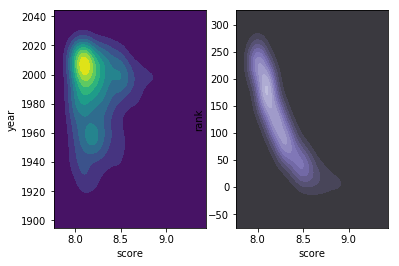

In [13]:
fig, ax =plt.subplots(1,2)

sns.kdeplot(df['score'],df['year'], shade=True, cmap='viridis', ax=ax[0])
sns.kdeplot(df['score'],df['rank'], shade=True, cmap="Purples_d", ax=ax[1])

If you notice in score vs year graph, it's quite bright in 2000-2020 section. Let's try to see how's the score of movies by year.

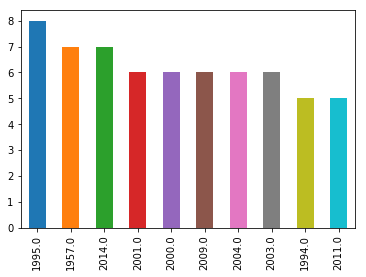

In [14]:
df['year'].value_counts().head(10).plot.bar()

,rank,title,year,link,linkMeta,director,starring,score,rating,duration,genre,metadate,summarytext,creditsInfo,storyline
21,21.0,Se7en,1995.0,https://www.imdb.com/title/tt0114369/?pf_rd_m=...,"David Fincher (dir.), Morgan Freeman, Brad Pitt",David Fincher,"Morgan Freeman, Brad Pitt",8.6,R,2h7min,Crime,"['R', '|', '2h', '7min', '|', 'Crime', ',', 'D...","Two detectives, a rookie and a veteran, hunt a...","[<div class=""credit_summary_item"">\n<h4 class=...",A film about two homicide detectives' (Mor...
26,26.0,The Usual Suspects,1995.0,https://www.imdb.com/title/tt0114814/?pf_rd_m=...,"Bryan Singer (dir.), Kevin Spacey, Gabriel Byrne",Bryan Singer,"Kevin Spacey, Gabriel Byrne",8.5,A,1h46min,Crime,"['A', '|', '1h', '46min', '|', 'Crime', ',', '...",A sole survivor tells of the twisty events lea...,"[<div class=""credit_summary_item"">\n<h4 class=...","Following a truck hijack in New York, five..."
73,73.0,Braveheart,1995.0,https://www.imdb.com/title/tt0112573/?pf_rd_m=...,"Mel Gibson (dir.), Mel Gibson, Sophie Marceau",Mel Gibson,"Mel Gibson, Sophie Marceau",8.3,R,2h58min,Biography,"['R', '|', '2h', '58min', '|', 'Biography', ',...",When his secret bride is executed for assaulti...,"[<div class=""credit_summary_item"">\n<h4 class=...",William Wallace is a Scottish rebel who le...
91,91.0,Toy Story,1995.0,https://www.imdb.com/title/tt0114709/?pf_rd_m=...,"John Lasseter (dir.), Tom Hanks, Tim Allen",John Lasseter,"Tom Hanks, Tim Allen",8.3,1h,|Animation,Adventure,"['1h', '21min', '|', 'Animation', ',', 'Advent...",A cowboy doll is profoundly threatened and jea...,"[<div class=""credit_summary_item"">\n<h4 class=...",A little boy named Andy loves to be in his...
122,122.0,Heat,1995.0,https://www.imdb.com/title/tt0113277/?pf_rd_m=...,"Michael Mann (dir.), Al Pacino, Robert De Niro",Michael Mann,"Al Pacino, Robert De Niro",8.2,R,2h50min,Crime,"['R', '|', '2h', '50min', '|', 'Crime', ',', '...",A group of professional bank robbers start to ...,"[<div class=""credit_summary_item"">\n<h4 class=...",Hunters and their prey--Neil and his profe...
143,143.0,Casino,1995.0,https://www.imdb.com/title/tt0112641/?pf_rd_m=...,"Martin Scorsese (dir.), Robert De Niro, Sharon...",Martin Scorsese,"Robert De Niro, Sharon Stone",8.2,A,2h58min,Crime,"['A', '|', '2h', '58min', '|', 'Crime', ',', '...","A tale of greed, deception, money, power, and ...","[<div class=""credit_summary_item"">\n<h4 class=...",This Martin Scorsese film depicts the Janu...
205,205.0,Before Sunrise,1995.0,https://www.imdb.com/title/tt0112471/?pf_rd_m=...,"Richard Linklater (dir.), Ethan Hawke, Julie D...",Richard Linklater,"Ethan Hawke, Julie Delpy",8.1,R,1h41min,Drama,"['R', '|', '1h', '41min', '|', 'Drama', ',', '...",A young man and woman meet on a train in Europ...,"[<div class=""credit_summary_item"">\n<h4 class=...",American tourist Jesse and French student ...
228,228.0,La haine,1995.0,https://www.imdb.com/title/tt0113247/?pf_rd_m=...,"Mathieu Kassovitz (dir.), Vincent Cassel, Hube...",Mathieu Kassovitz,"Vincent Cassel, Hubert Koundé",8.0,1h,|Crime,Drama,"['1h', '38min', '|', 'Crime', ',', 'Drama', '|...",24 hours in the lives of three young men in th...,"[<div class=""credit_summary_item"">\n<h4 class=...",The film follows three young men and their...


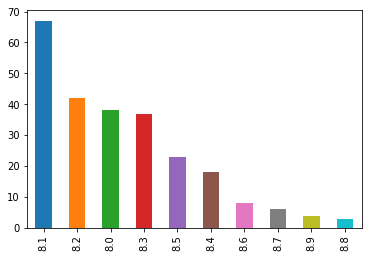

In [15]:
df['score'].value_counts().head(10).plot.bar()
df[ df.year == 1995 ]

### Which director has most movies in Top 250

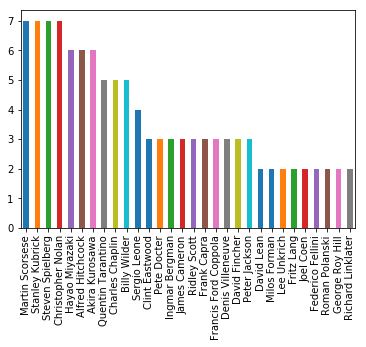

In [22]:
df.director.value_counts().head(30).plot(kind="bar");

1995 with most movies in top 250 list as of now

In [24]:
df[df.year == 1995.0]

,rank,title,year,link,linkMeta,director,starring,score,rating,duration,genre,metadate,summarytext,creditsInfo,storyline
21,21.0,Se7en,1995.0,https://www.imdb.com/title/tt0114369/?pf_rd_m=...,"David Fincher (dir.), Morgan Freeman, Brad Pitt",David Fincher,"Morgan Freeman, Brad Pitt",8.6,R,2h7min,Crime,"['R', '|', '2h', '7min', '|', 'Crime', ',', 'D...","Two detectives, a rookie and a veteran, hunt a...","[<div class=""credit_summary_item"">\n<h4 class=...",A film about two homicide detectives' (Mor...
26,26.0,The Usual Suspects,1995.0,https://www.imdb.com/title/tt0114814/?pf_rd_m=...,"Bryan Singer (dir.), Kevin Spacey, Gabriel Byrne",Bryan Singer,"Kevin Spacey, Gabriel Byrne",8.5,A,1h46min,Crime,"['A', '|', '1h', '46min', '|', 'Crime', ',', '...",A sole survivor tells of the twisty events lea...,"[<div class=""credit_summary_item"">\n<h4 class=...","Following a truck hijack in New York, five..."
73,73.0,Braveheart,1995.0,https://www.imdb.com/title/tt0112573/?pf_rd_m=...,"Mel Gibson (dir.), Mel Gibson, Sophie Marceau",Mel Gibson,"Mel Gibson, Sophie Marceau",8.3,R,2h58min,Biography,"['R', '|', '2h', '58min', '|', 'Biography', ',...",When his secret bride is executed for assaulti...,"[<div class=""credit_summary_item"">\n<h4 class=...",William Wallace is a Scottish rebel who le...
91,91.0,Toy Story,1995.0,https://www.imdb.com/title/tt0114709/?pf_rd_m=...,"John Lasseter (dir.), Tom Hanks, Tim Allen",John Lasseter,"Tom Hanks, Tim Allen",8.3,1h,|Animation,Adventure,"['1h', '21min', '|', 'Animation', ',', 'Advent...",A cowboy doll is profoundly threatened and jea...,"[<div class=""credit_summary_item"">\n<h4 class=...",A little boy named Andy loves to be in his...
122,122.0,Heat,1995.0,https://www.imdb.com/title/tt0113277/?pf_rd_m=...,"Michael Mann (dir.), Al Pacino, Robert De Niro",Michael Mann,"Al Pacino, Robert De Niro",8.2,R,2h50min,Crime,"['R', '|', '2h', '50min', '|', 'Crime', ',', '...",A group of professional bank robbers start to ...,"[<div class=""credit_summary_item"">\n<h4 class=...",Hunters and their prey--Neil and his profe...
143,143.0,Casino,1995.0,https://www.imdb.com/title/tt0112641/?pf_rd_m=...,"Martin Scorsese (dir.), Robert De Niro, Sharon...",Martin Scorsese,"Robert De Niro, Sharon Stone",8.2,A,2h58min,Crime,"['A', '|', '2h', '58min', '|', 'Crime', ',', '...","A tale of greed, deception, money, power, and ...","[<div class=""credit_summary_item"">\n<h4 class=...",This Martin Scorsese film depicts the Janu...
205,205.0,Before Sunrise,1995.0,https://www.imdb.com/title/tt0112471/?pf_rd_m=...,"Richard Linklater (dir.), Ethan Hawke, Julie D...",Richard Linklater,"Ethan Hawke, Julie Delpy",8.1,R,1h41min,Drama,"['R', '|', '1h', '41min', '|', 'Drama', ',', '...",A young man and woman meet on a train in Europ...,"[<div class=""credit_summary_item"">\n<h4 class=...",American tourist Jesse and French student ...
228,228.0,La haine,1995.0,https://www.imdb.com/title/tt0113247/?pf_rd_m=...,"Mathieu Kassovitz (dir.), Vincent Cassel, Hube...",Mathieu Kassovitz,"Vincent Cassel, Hubert Koundé",8.0,1h,|Crime,Drama,"['1h', '38min', '|', 'Crime', ',', 'Drama', '|...",24 hours in the lives of three young men in th...,"[<div class=""credit_summary_item"">\n<h4 class=...",The film follows three young men and their...


### Word maps of Actors and keywords from Plot description

Every movie has a small description, let's see if there is some pattern we can find in plot keywords by Wordmap

In [25]:
# Causing crash. Needs to fix it before running

# plotKeywords = ''
# for x in df['storyline']:
#     plotKeywords += plotKeywords.join(str(x).strip())

# wordcloud = WordCloud(width=1500, height=1000, stopwords = STOPWORDS).generate(plotKeywords)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

Should we try out wordmap of actors? Why not.

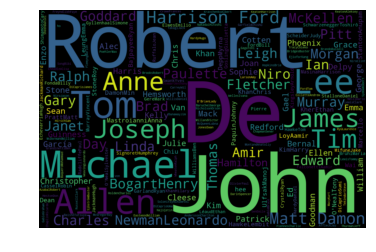

In [91]:
listOfActors = ''
for x in df['starring']:
    stars = str(x).split(',')
    listOfActors = listOfActors.join(stars)

wordcloud = WordCloud(width=1500, height=1000, stopwords = STOPWORDS).generate(listOfActors)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I also want to see what's the usual average duration of movies in this list. However, as our duration field is in xhymin format, we will have to parse it to concert it into number.

*Note: I could have scraped the date in exact this format from the start, but I didn't thought of it at that time. And now I'm being little lazy to scrap it again*

/home/mukul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/mukul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/mukul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

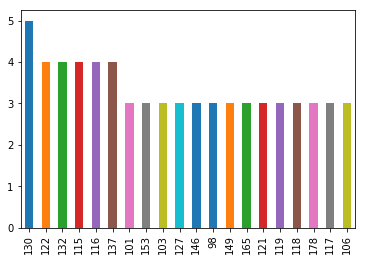

In [77]:
dfWithoutNanDuration = df.dropna( subset=['duration'] )
dfWithValidDuration = dfWithoutNanDuration[dfWithoutNanDuration['duration'].apply(regex_filter)]
dHour = []
dMin = []

for duration in dfWithValidDuration['duration']:
    dHour.append(int(re.search(DURATION_REGEX, duration, re.MULTILINE).group(1)))
    dMin.append(int(re.search(DURATION_REGEX, duration, re.MULTILINE).group(2)))

dfWithValidDuration['duration_hour'] = dHour
dfWithValidDuration['duration_min'] = dMin

dfWithValidDuration['durationTotal'] = (dfWithValidDuration['duration_hour'] * 60) + dfWithValidDuration['duration_min']

dfWithValidDuration.durationTotal.value_counts().head(20).plot.bar()

In [108]:
dfWithValidDuration.groupby('durationTotal').count()

,rank,title,year,link,linkMeta,director,starring,score,rating,duration,genre,metadate,summarytext,creditsInfo,storyline,duration_hour,duration_min
durationTotal,,,,,,,,,,,,,,,,,
80,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
88,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
89,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
92,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
93,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
95,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
96,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
98,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [88]:
dfWithValidDuration.groupby('durationTotal').agg(['min', 'max', 'std'])

rank                       year                    score       \
                 min    max         std     min     max        std   min  max   
durationTotal                                                                   
80             240.0  240.0         NaN  2004.0  2004.0        NaN   8.0  8.0   
87              34.0   34.0         NaN  1931.0  1931.0        NaN   8.5  8.5   
88              47.0   47.0         NaN  1994.0  1994.0        NaN   8.5  8.5   
89             128.0  128.0         NaN  1997.0  1997.0        NaN   8.2  8.2   
92             219.0  219.0         NaN  2001.0  2001.0        NaN   8.0  8.0   
93             156.0  156.0         NaN  1996.0  1996.0        NaN   8.1  8.1   
95              58.0  145.0   61.518290  1964.0  2015.0  36.062446   8.2  8.4   
96             113.0  113.0         NaN  2009.0  2009.0        NaN   8.2  8.2   
98             162.0  236.0   38.935845  1996.0  2010.0   7.211103   8.0  8.1   
99              76.0  188.0   79.195959  1992.0  2014.0  15.556349   8.1  8.3   
101             67.0  229.0   87.429972  1993.0  2003.0   5.291503   8.0  8.3   
102             36.0  233.0  103.229518  1939.0  2000.0  34.385074   8.0  8.5   
103             93.0  190.0   54.095594  1952.0  2010.0  30.615900   8.1  8.3   
104            103.0  241.0   97.580736  2000.0  2008.0   5.656854   8.0  8.3   
105             68.0   68.0         NaN  2017.0  2017.0        NaN   8.3  8.3   
106             26.0   78.0   26.514147  1995.0  2016.0  11.590226   8.3  8.5   
107            142.0  159.0   12.020815  1998.0  1999.0   0.707107   8.1  8.2   
108             85.0   85.0         NaN  2004.0  2004.0        NaN   8.3  8.3   
109             32.0  161.0   91.216775  1960.0  1982.0  15.556349   8.1  8.5   
110             29.0  215.0  131.521861  1969.0  1994.0  17.677670   8.0  8.5   
111            169.0  169.0         NaN  2003.0  2003.0        NaN   8.1  8.1   
112             38.0   44.0    4.242641  1954.0  2011.0  40.305087   8.5  8.5   
113             50.0  223.0  122.329473  2000.0  2001.0   0.707107   8.0  8.4   
115             45.0  244.0   83.787429  1981.0  2017.0  16.028620   8.0  8.5   
116             25.0  163.0   62.665780  1979.0  2008.0  12.893797   8.1  8.6   
117            152.0  213.0   31.628047  1982.0  1998.0   8.717798   8.0  8.1   
118             23.0  146.0   66.650831  1991.0  2015.0  12.124356   8.1  8.6   
119             33.0  134.0   50.934599  1941.0  2004.0  34.770677   8.2  8.5   
121             22.0  245.0  116.671905  1977.0  2014.0  19.139836   8.0  8.6   
122             65.0  180.0   54.962866  1999.0  2014.0   6.751543   8.1  8.4   
...              ...    ...         ...     ...     ...        ...   ...  ...   
142              1.0   12.0    7.778175  1994.0  1994.0   0.000000   8.7  9.2   
143            248.0  248.0         NaN  2003.0  2003.0        NaN   8.0  8.0   
146             17.0  235.0  115.468610  1980.0  2011.0  15.821926   8.0  8.7   
147             49.0   49.0         NaN  1979.0  1979.0        NaN   8.4  8.4   
148             14.0  182.0  118.793939  2007.0  2010.0   2.121320   8.1  8.7   
149             51.0  179.0   68.857340  1981.0  2018.0  20.305993   8.1  8.4   
150             39.0   39.0         NaN  2002.0  2002.0        NaN   8.5  8.5   
151             40.0   40.0         NaN  2006.0  2006.0        NaN   8.5  8.5   
152              4.0    4.0         NaN  2008.0  2008.0        NaN   9.0  9.0   
153             95.0  246.0   78.869090  2009.0  2014.0   2.645751   8.0  8.3   
154              8.0  211.0  143.542677  1994.0  2000.0   4.242641   8.1  8.9   
155             46.0   54.0    5.656854  1988.0  2000.0   8.485281   8.4  8.5   
156            119.0  119.0         NaN  2004.0  2004.0        NaN   8.2  8.2   
157            201.0  201.0         NaN  2006.0  2006.0        NaN   8.1  8.1   
158            158.0  158.0         NaN  2007.0  2007.0        NaN   8.1  8.1   
160             82.0   82.0         NaN  1984.0